# 8. K-Means Clustering and Gaussian Mixture Model

<div style="text-align: right"> 2020.02.19 (수) | 백진우</div>

**Objectives**
* <u>Understand the clustering task and the K-means algorithm</u>
    * Know what the unsupervised learning is
    * Understand the K-means iterative process
    * Know the limitation of the K-means algorithm
<br><br>
* <u>Understand the Gaussian mixture model</u>
    * Know the multinomial distribution and the multivariate Gaussian distribution
    * Know why mixture models are useful
    * Understand how the parameter updates are derived from the Gaussian mixture model
<br><br>
* <u>Understand the EM algorithm</u>
    * Know the fundamentals of the EM algorithm
    * Know how to derive the EM updates of a model

--------

## 8.1 K-Means Algorithm

kmeans 알고리즘에 대해서 알아봅시다

### 8.1.1 Unsupervised learning

실제값을 모르는 상태에서 패턴을 찾는 문제이다. 예시) 군집화, 필터링

### 8.1.2 Clustering Problem

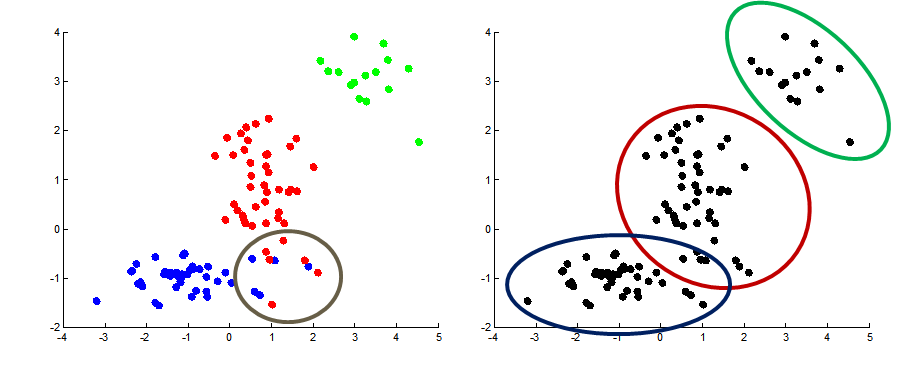

문제점 : 검은색 동그라마 원 친 부분에서 클러스터링 할 때 어느 부분인지 헷갈린다.

### 8.1.3 K-Means Algorithm

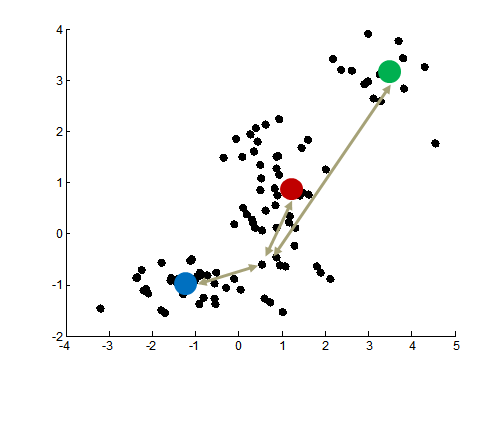

#### **알고리즘 설명**

1) K개의 중심점을 찾는다<br>
2) 개별점들은 가까이 있는 중심점에 할당된다.<br><br>
#### **수식**
$$J = \sum_{n=1}^N\sum_{k=1}^K r_{nk}||x_n-u_k||^2$$
**Minimize J by optimizing**
   * N : 전체 점들의 개수
   * K : 중심점의 개수(군집의 개수)
   * $r_{nk}$ : the assignment of data points to clusters, <br>만약에 $r_{12}$이면 첫번째 점이 2번째 군집화에 있으면 1, 아니면 0인 것이다.
   * $u_k$ : the location of centroids <br>
   
**Iterative optimization**
   * 전에는 $\theta$ 하나만 미분시켜서 찾으면 되었지만 이번에는 $r_{nk}$, $u_k$ 두개의 변수가 있기 때문에 iterative 최적화를 해야한다.
   * $r_{nk}$을 먼저 미분하여 최소값을 찾은 다음에 그것을 바탕으로 $u_k$의 최소값을 찾는다. 그다음에는 $u_k$을 미분하여 최소값을 찾은 다음에 그것을 바탕으로 $r_{nk}$을 찾는다. 이것을 iterative하게 반복하면서 최소값을 찾는 것이다. <br>
   
**Expectation and Maximization**
   * Expectation 
      * Expectation of the log-likelihood given the parameters
      * Assign the data points to the nearest centroid -> $r_{nk}$ <br><br>
   * Maximization
      * Maximization of the parameters with respect to the log-likelihood
      * Update the centroid positions given the assignments -> $u_k$ <br><br>
   * 처음에는 $u_k$가 랜덤하게 엉터리로 배정되어 있을 것이다. 이것을 바탕으로 $r_{nk}$을 최적화 시키고 또한 이것을 가지고 $u_k$을 최적화 시킨다. 이것을 반복적으로 하는 과정을 EM 과정이라고 한다. <br><br>
   
**$r_{nk}$ & $u_k$**
   * $r_{nk}$
    * $r_{nk} = {0, 1}$
    * Discrete variable
    * Logical choice: the nearest centroid 𝜇_𝑘 for a data point of 𝑥_𝑛
   
   * $u_k$
     * $r_{nk}$가 구해진 상태라고 가정하고 구해보자
     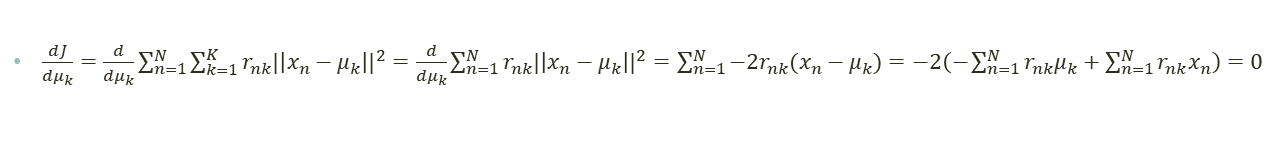 <br>
     * $u_k =  \frac{\sum_{n=1}^N r_{nk} *x_n}{\sum_{n=1}^N r_{nk}}$
     * 즉 위의 식은 할당된 데이터 포인트들의 평균값이 되는 것이다.


### 8.1.4 Progress of K-Means Algorithm

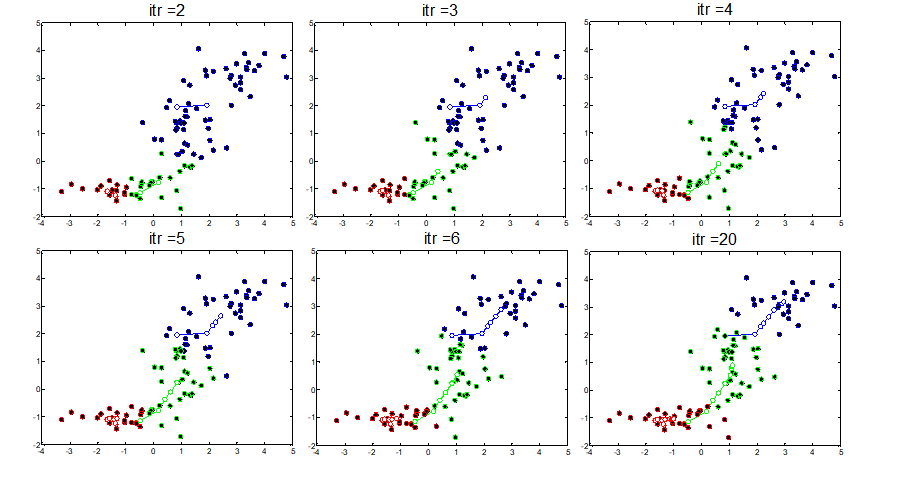

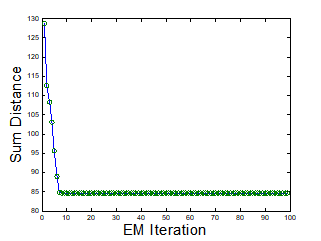

* 반복횟수가 10번이후에는 최소값의 변화가 없다. 하지만 이것은 local optimal일 가능성이 있다.

### 8.1.5 Properties of K-Means Algorithm

* K의 개수를 정하는 문제점(Bayesian optimization 사용하면 된다)
* 초기 중심점 잡는 법(랜덤, 평균), 중심점을 잘 못 잡으면 나쁜 local optimal에 빠질 수 있음, 따라서 여러번 중심점을 바꿔가며 해야함
* distance metrics에 문제점, 이것은 유클리드 거리만 생각하는데 좋은 가정이 아니다. 모든 차원이 동일한 가중치가 있어서 문제가 있다. 예를 들어 y축이 x축보다 더 중요한 정보라는 사전 정보가 있는데 유클리드 거리는 가중치가 서로 같게 할 수 밖에 없다.
* Hard clustering 문제점, 애매한 점은 확실하게 이야기 어렵다. 이러한 점은 hard clustering이 아닌 soft clustering이 필요하다.

* distance metrics와 hard clustering 문제점을 가우시안 기법을 통해 극복할 수 있음


------------

## 8.2 Gaussian mixture model

### 8.2.1 Multinomial Distribution(다항 분포)

예전에 했던 이항 분포처럼 0,1 만 선택하는 것이 아니라 여러개의 선택지를 주는 것이다. 만약 k의 선택지가 주언지다면 확률식이 아래와 같이 나온다. <br>
$X_k$는 그 사건이 일어나면 1 아니면 0인 변수이고 $u_k$는 그 사건이 일어날 확률이다. 한 사건의 확률이기 때문에 0보다 크거나 같고 총 합은 1이 된다.

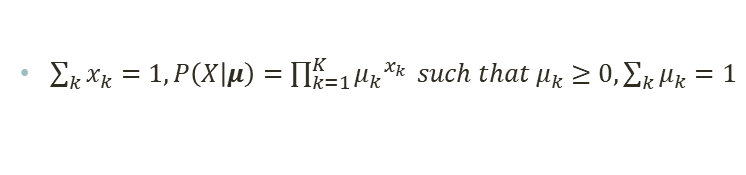

밑의 확률은 K개의 선택지에 N번의 선택을 한다고 할 때의 확률이다. 두번째 식에서 세번째 식으로 넘어갈 때 지수의 곱이니 시그마로 바뀌어서 된다.<br>만약 4지선다 문제가 25개 있으면 k가 4, N이 25가 되는 것이다.

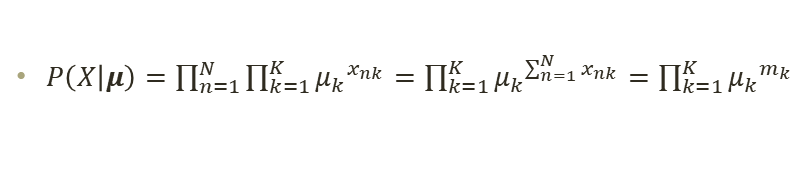

**u의 확률을 어떻게 구할 수 있을까?**

4지선다의 각각의 정답 확률을 어떻게 구할까? 라는 것과 같은 질문이다. 첫번째 강의 시간에 나온 MLE을 이용해서 구할 수 있다.<br>
주어진 파라미터에서 선택지가 나올 확률의 최대화시켜주는 것이 MLE이다. 위의 식을 최대화하는 것이다! 하지만 $u_k$가 0이상이고 총 합이 1이어야 하는 제약조건이 있다.

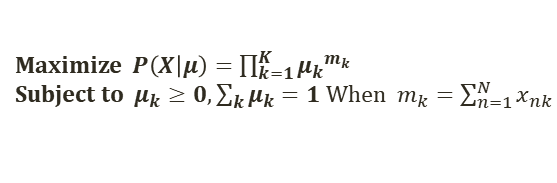

**Largrange Method**

1. Lagrange function and multiplier (do you recall this?)
    * $L(u,m,\lambda) = \sum_{k=1}^Km_klnu_k + \lambda(\sum_{k=1}^Ku_k-1)$ (Using the log likelihood)
<br><br>
2. Take the partial first-order derivative of variables, and set it to be zero
    * $\frac{d}{du_k}L(u,m,\lambda) = \frac{m_k}{u_k} + \lambda = 0 -> u_k = -\frac{m_k}{\lambda}$
<br><br>
3. Utilize the constraint to get the optimized value
    * $\sum_{k}u_k = 1 -> \sum_{k}-\frac{m_k}{\lambda} = 1 -> \sum_{k}m_k = -\lambda -> \sum_{k}\sum_{n=1}^Nx_{nk} = -\lambda -> N = - \lambda $
    * $u_k = \frac{m_k}{N}$
    * 즉 $u_k$는 전체 선택지 개수 분의 특정 선택지가 선택된 개수인 것이다.
    * $\theta$ = $\frac{H}{H+T}$, 이항 분포도 위랑 같은 모양이다 H+T 가 N이 되고, H는 m_k가 되는 것이다.


### 8.2.2 Multivariate Gaussian Distribution

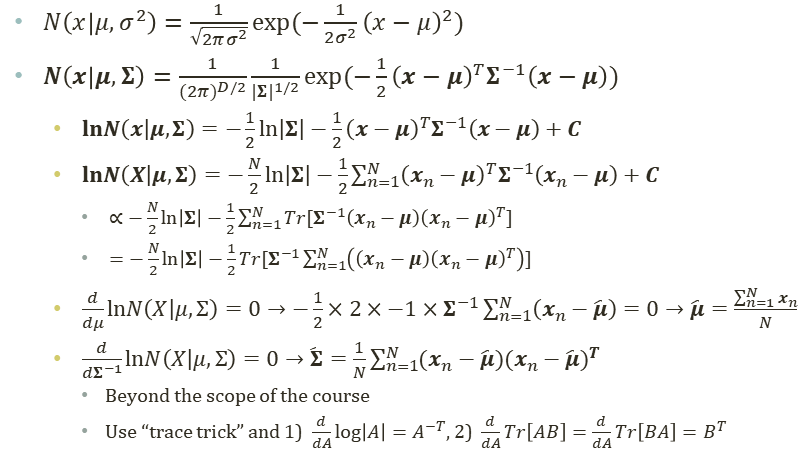

강의에서도 식이 이렇다고 하고 자세히 설명이 없었음

**Samples of Multivariate Gaussian Distribution**

* With various covariance matrixes
* Covariance matrix should a positive-definite matrix <br>
  * $z^T\sum z$ for every non-zero column vector z

1. X축, Y축 둘다 분산과 공분산이 1인경우, 공분산이 1로 되어 있어 직선형태로 되어 있다
2. 다 0인 경우이다
3. X축 분산만 1이고 나머지는 0인 경우이다
4. X축. Y축 분산이 1이고 공분산은 0인경우, 관련성이 없어서 0으로 나타낸다
5. X축 분산이 5, Y축 분산이 1이어서 X축으로 더 퍼져있다
6. X축 분산이 1, Y축 분산이 5이어서 X축으로 더 퍼져있다
7. X축, Y축 분산이 2, 공분산이 1이어서 1번 같은 형태로 되어 있지만 더 퍼져있다
8. X축, Y축 분산이 2, 공분산이 -1이어서 1번과 반대방향으로 되어 있고 더 퍼져잇디 <br><br>

Convariance matrix에 따라서 shape가 달라짐. 그래서 Multivariate Gaussian에서 Convariance matrix가 중요하다는 것을 알 수 있다

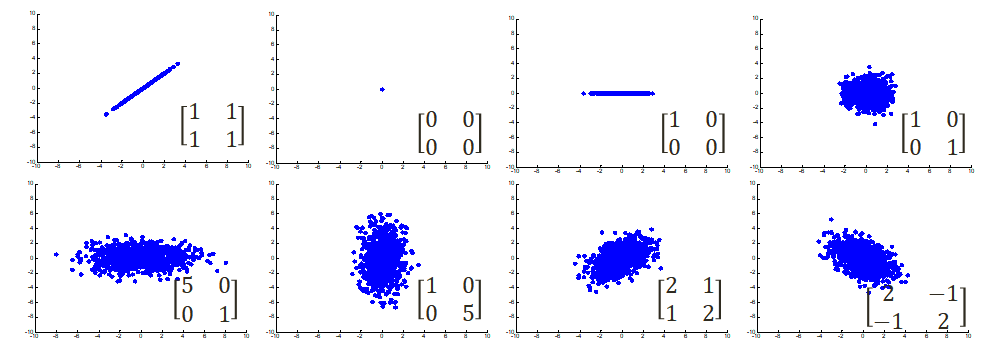

### 8.2.3 Mixture Model

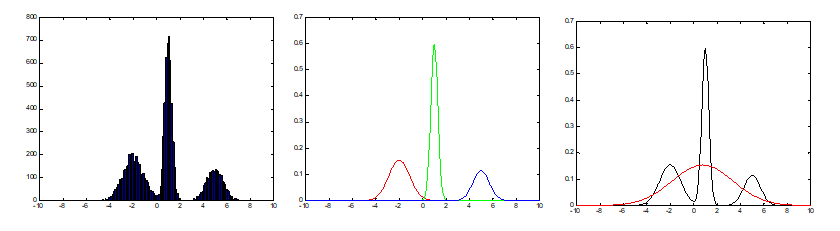

* 각각이 분리되어 있다. 검은색은 사실 빨강 파랑 초록색의 세개로 분리되어 있는 분산이다.
* 단일 모델로는 처음 것이 설명이 안되어 Miture Model을 사용한다.

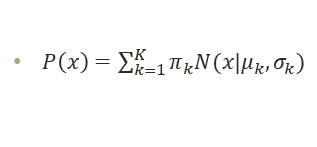

* Mixing coefficents, $\pi_k$는 k개의 옵션중에서 특정 i번쨰 normal이 선택될 확률이다. 
  * Weighting과 유사하게 작용한다.
  * $\sum_{k=1}^K\pi_k = 1, 0\leq\pi_k\leq1$
  * 새로운 변수 Z로 부른다.<br>
* Mixture component N(x|$u_k, \sigma_k$)는 각각의 분리된 분포이다.

즉 $\pi_k$는 Multinomial Distribution으로 N(x|$u_k, \sigma_k$)는 Multivariate Gaussian Distribution을 사용하는 것이다

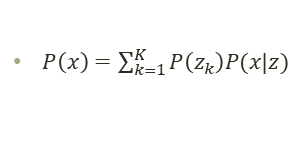

### 8.2.4 Gaussian Mixture Model

Let’s assume that the data points are drawn from a mixture distribution of multiple multivariate Gaussian distributions

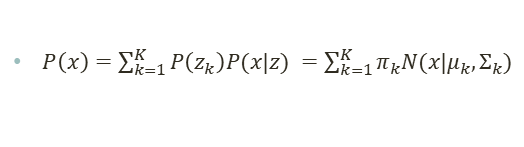

#### Mixing coefficient, or Selection variable: $z_k$

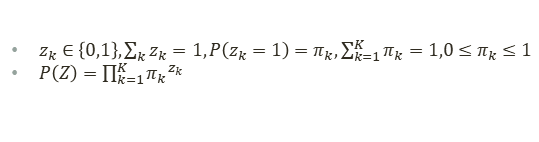

$z_k$는 첫번째 클러스터를 선택할 것이냐 2번째 클러스트터를 선택할 변수이다. 
여기서 위의 Kmeans 알고리즘과 다른 점은 $r_{nk}$는 0혹은 1로 들어가지만 여기서는 $\pi_k$처럼 확률로 들어가게 된다. 

#### Mixture component

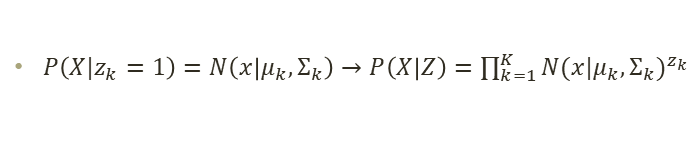

위의식은 K번째 클러스터가 선택되어져 있을때 확률값을 구하는 것이다. 각각의 클러스트마다 다른 Normal 함수를 사용한다. k라는게 여러개 있으니깐 다중선택을 하는데 특정 miture component만 활용하겠다해서 $z_k$가 위의 지수에 있는 것이다.

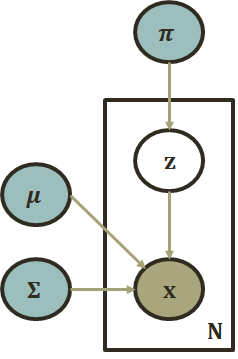
* 파란색 : 파라미터 형태
* 회색 : 관측이 된 데이터
* N : N개만큼 반복적으로 나온다.(x, z가 N개 존재한다)
* X가 결정되는데 u, 시그마, z가 필요하다.

특정 X 포인트가 있을때 k번쨰 클러스트에 할당된 확률이 무엇일까? 예전에는 중심점이 선택되면 x가 얼마만큼으로 선택될까 였는데 x가 주어졌을때 어떤 클러스트로 할당되는지 살펴보자.

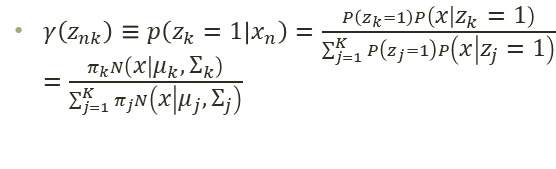

$p(X|z_k = 1)$는 위의 P(X|K) = $\prod_{k=1}^{K}N(x|u_k, \sum_k)^{z_K}$ 하지만 z_k = 1이고 하나만 선택되어니 하나로 나옴! <br>
$\pi_k$는 확률로 나온다.

* Log likelihood of the entire dataset is
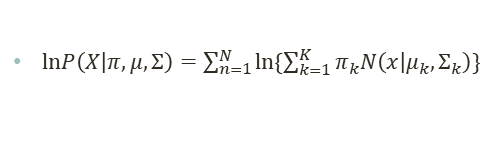

#### Expectation of GMM

* Kmeans과 상당히 비슷한 문제이다
    * 두개의 interacting 변수가 있다.(u와 $\sum$)
    * EM
        * Expectation : 할당(예전에는 0과 1 하드하게 했지만 이번에는 소프트하게 확률로 한다.)
        * Maximization : 파라미터 업데이트 
<br><br>
* Expectation step
    * 기존에는 가까운 클러스터를 할당하는 것이었지만 GMM에서는 확률로 표시한다.
    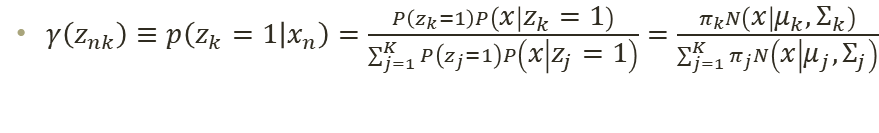

#### Maximization of GMM

우리가 최적화 해야하는 식 <br>
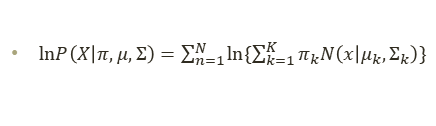

주어진 식

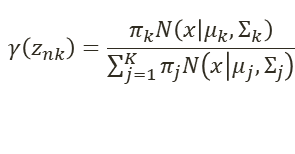

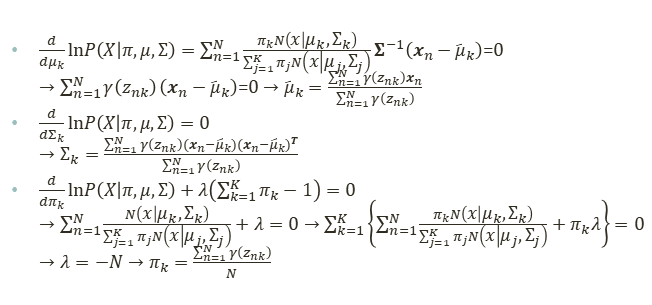

#### Progress of GMM

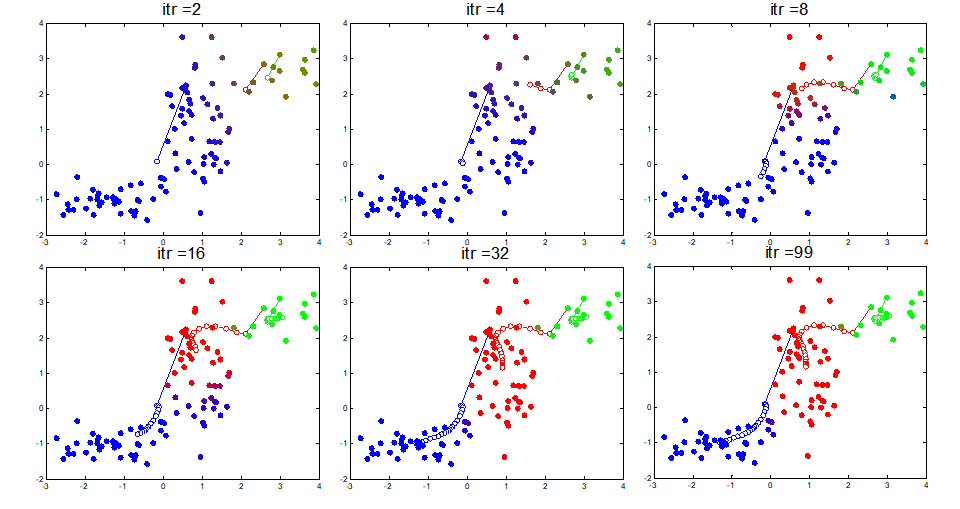

* 흐릿한 점은 어떤점인지 헷갈릴 때 그렇다. (soft)
* 각 중점은 $u_k$값을 나타낸 것이다.
* 진행이 될수록 흐릿한점이 적어지면서 잘 클러스터링 된다.
* Convariance matrix을 사용하여 Uclid 거리법만 사용할 수 있는 Kmeans 단점을 극복하였다.

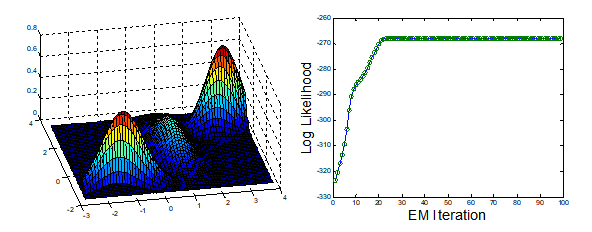

#### Properties of GMM

* Pros and cons of Gaussian mixture model
    * Procs
        * More information
            * Soft clustering
            * Not a simple and discrete assignment
        * More and more information
            * Learn the latent distribution
            * Distance is not always the anser of the distribution
    * Cons
        * Long computation time
        * Falling into local maximum(EM 문제점)
        * Deciding K

#### Relation between K-Means and GMM

##### GMM

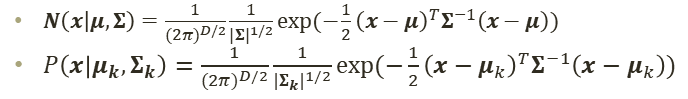

* Let's say $\sum_k =\epsilon I$ -> 즉 covaraince matix가 스몰 입실론을 붙인 identity vector라고 하자. 개별 차원상으로만 분산이 있고 다른 차원간의 공분산이 없다는 것이다.
    * Here, I is the identity matrix and 𝜖 is not updated by the EM process

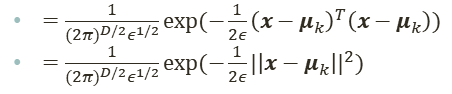

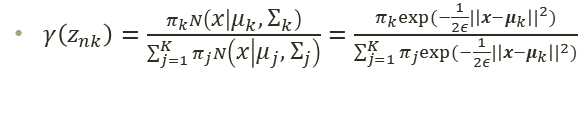

* 사고실험
    * $\epsilon$이 0으로 점점 간다면 exp안에 항 자체는 점점 작아지고 exp 함수가 있으니 점점 0으로 갈 것이다. 또한 $||x-u_k||^2$ 값이 클수록 0으로 가는 속도가 빠를 것이고 이 값이 작을 수록 0으로 향하는 속도가 느릴 것이다.만약 특정 클러스트가 $||x-u_k||^2$값이 매우 작으면 나머지는 0이지만 이 클러스트는 값을 가질 것이다.
    * 이 사고 실험은 soft 분류가 점점 hard 분류로 변환한다는 것을 의미한다. 
* GMM은 사실 Kmeans의 슈퍼 셋이다. Kmeans가 하는 일을 얼마든지 GMM이 얼마든지 할 수 있다. GMM은 Kmeans에 Soft assignment 와 Convariance matrix 가 추가적으로 넣은 것이다.

### 8.2.5 EM algorithm

#### Inference with Latent Variables

* Difference between classification and clustering, latent variable이 없으면 classfication, 있으면 clustering이다.
* {X, Z} : complete set of variables
* X : observed variables
* Z : hidden(latent) variables
* $\theta$ : parameters for distributions

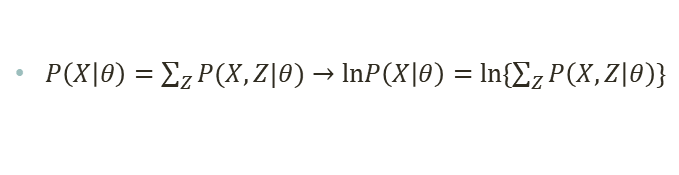

* 이것을 최대화 하는 문제이다. 이것은 log속에 summation이 있으니 상당히 복잡해진다.
* Z와 $\theta$는 interacting 하게 최적화해야한다. -> EM 기법 사용

#### Probability Decomposition

**Jensen's Inequality**

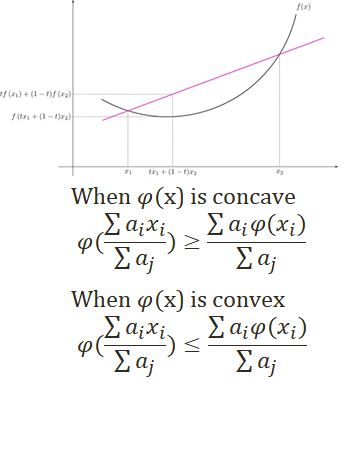

* 위에는 convex한 경우 log는 concave한 경우이다!

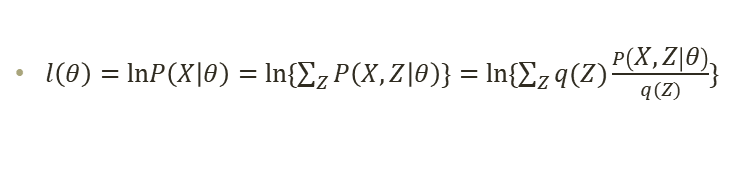

* log는 concave한 형태이니 밑에 같은 식으로 다시 바꿀 수 있다!

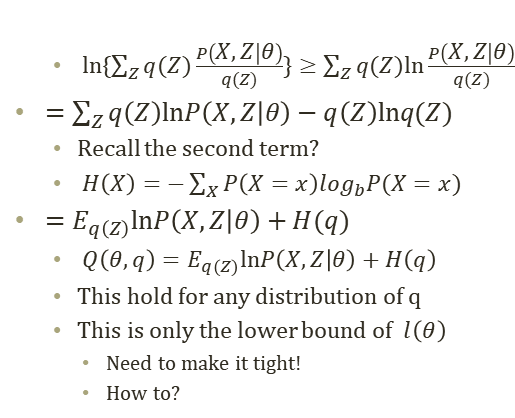

앞에는 weight sum 형태 뒤에는 엔트로피 형태로 표현할수 있다. <br>
Q는 확률함수이지 어떤 형태의 분포여도 상관없다.

즉 뒤에식을 올리는 것은 앞에 것을 올리는데 도움이 된다! 쉽게 말하면 low bound을 tight하게 최적화시켜주는 내용이다!

#### Maximizing the Lower Bound (1)

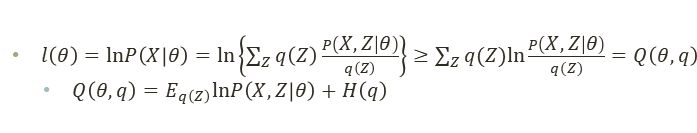

이 식을 다르게 표현해보면 아래와 같다.

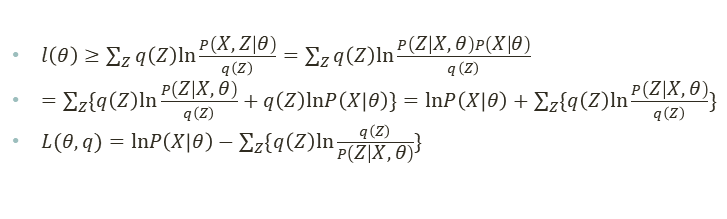

두번째 텀이 매우 중요하다!! 위에 식에서 lnP(X|$\theta$)에서 뺀 식이 나온것이다! 이 식을 0으로 만들도록 해야한다.

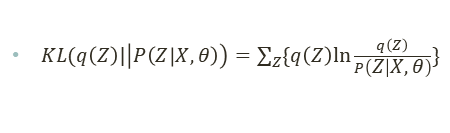

q(z)와 P(Z|X, $\theta$)가 같으면 식이 0이된다!

#### KL Divergence

확률 분포간의 서로 얼마만큼의 차이가 있는지 재기위해서 만든 거이다! 서로차이가 심할수록 값이 커지고 값은 서로에게 상대적이다!

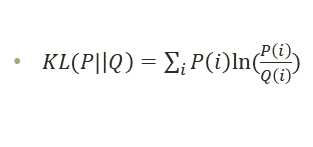

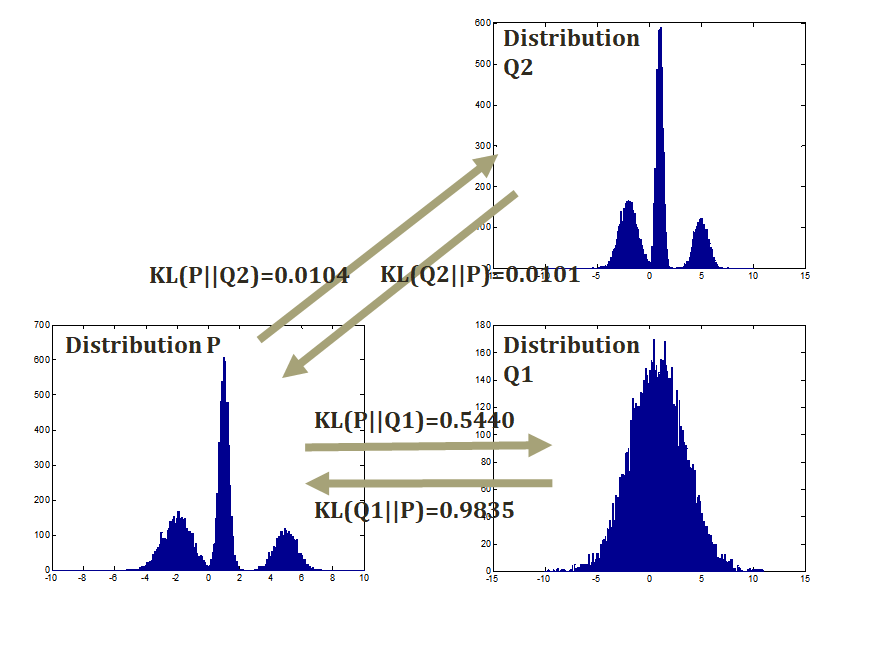

####  Maximizing the Lower Bound (2)

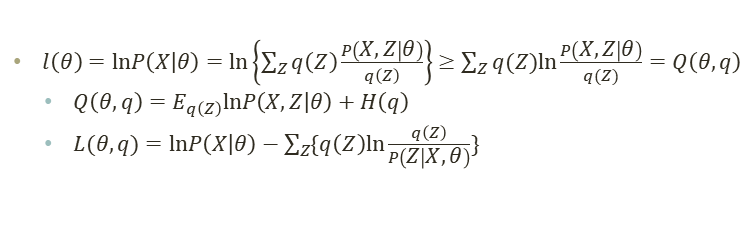

* 첫번째 Q($\theta$, q)는 q(Z)을 알지 않은 이상 optimize하기 어렵다.
* L($\theta$, q)
    * 첫번째 항은 특정시간 t에서 $\theta$가 주어졌을 때 고정된 값이다.
    * 두번째 항은 최소화가 가능하다.
        * $q^t(Z) = P(Z|X,\theta^t)$ 일때 0이된다.

**Then, Optimizing $\theta$ to retrieve the tight lower bound is**

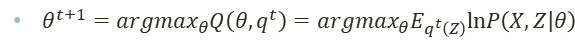

* 즉 특정 시간의 $\theta$ 값을 알고 있으면 $q^t(Z)$을 알 수 있어서 Z에 대한 distribution을 알 수 있었고 그것을 알 수 있으니 엔트로피값 등 Q($\theta$, q)을 알아낼 수 있다. 그러니 Q($\theta$, q)을 optimize 할 수 있다. 이것을 optimize한것을 통해서 $\theta^{t+1}$값을 알 수 있다. 또 이 값을 이용해 다시 $q^{t+1}(Z)$을 알 수 있고 또 다시  $\theta^{t+2}$값을 알 수 있다. 이러한 것을 반복하는 것이 EM 알고리즘의 핵심이다!

#### Graphical Interpretation of Lower Bound Maximization

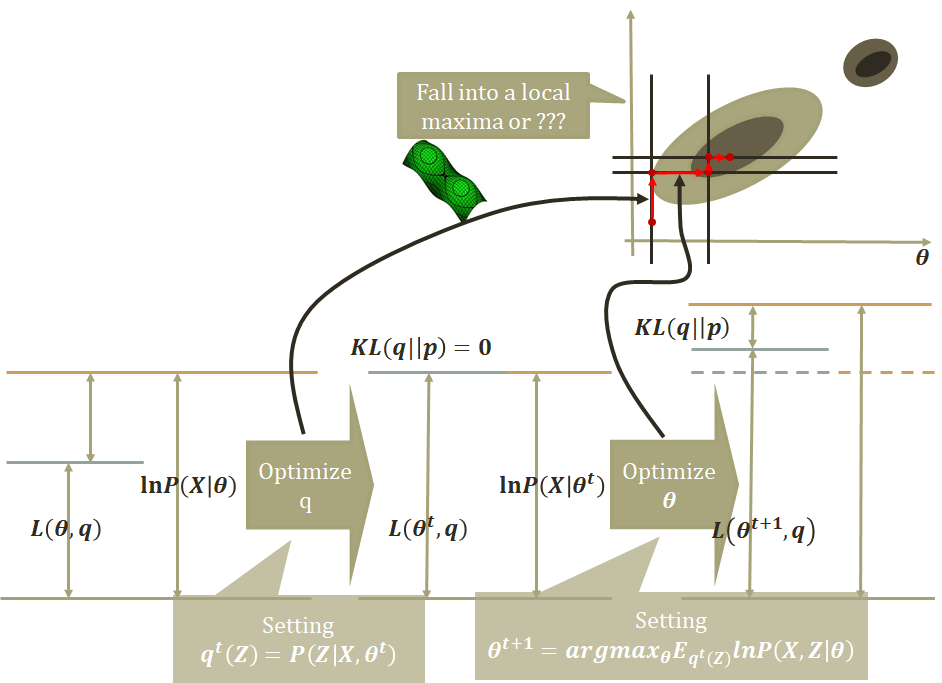

* local 문제는 아직도 있다!